In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def gen_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time-offset1)*(freq1*10+10))
    series += 0.2 * np.sin((time-offset2)*(freq2*20+20))
    series += 0.1 * (np.random.rand(batch_size, n_steps)-0.5)
    return np.expand_dims(series, -1).astype(np.float32)


n_steps = 50
series = gen_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_test, y_test = series[7000:, :n_steps], series[7000:, -1]
print(X_train.shape)
print(y_train.shape)

(7000, 50, 1)
(7000, 1)


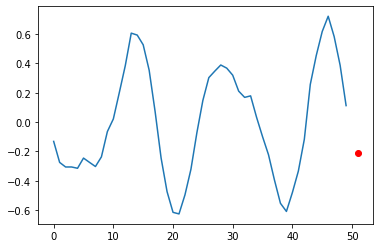

In [6]:
_, axe = plt.subplots()
axe.plot(X_train[3])
axe.scatter([51], y_train[3], c='r')

In [9]:
model = keras.Sequential([
    keras.layers.SimpleRNN(5, input_shape=(None, 1))   # 레이어 한개에 유닛 5개
])

model.compile(optimizer='adam', loss='mse', metrics='mae')
model.summary()
hist = model.fit(X_train, y_train, epochs=10)
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 5)                 35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
219/219 [==============================] - 2s 6ms/step - loss: 0.1582 - mae: 0.3331
Epoch 2/10
219/219 [==============================] - 1s 6ms/step - loss: 0.1084 - mae: 0.2728
Epoch 3/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0681 - mae: 0.2093
Epoch 4/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0425 - mae: 0.1624
Epoch 5/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0336 - mae: 0.1454
Epoch 6/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0284 - mae: 0.1339
Epoch 7/10
219/2

In [12]:
print(X_train.shape)

model = keras.Sequential([
    keras.layers.SimpleRNN(10, return_sequences=True , input_shape=(None, 1)),    # 레이어 3단 유닛 10 5 1
    keras.layers.SimpleRNN(5, return_sequences=True),                             # return_sequences : 다음번 레이어로 넘어가기 위해서
    keras.layers.SimpleRNN(1)
])

model.compile(optimizer='adam', loss='mse', metrics='mae')
model.summary()
hist = model.fit(X_train, y_train, epochs=10)
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

(7000, 50, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 10)          120       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 5)           80        
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 1)                 7         
                                                                 
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
219/219 [==============================] - 7s 19ms/step - loss: 0.0412 - mae: 0.1511
Epoch 2/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0124 - mae: 0.0896
Epoch 3/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0075 - mae: 0.0701
Epoch 4/10
219/219

In [13]:
###########
sample_data = np.arange(1*3*1).reshape(1,3,1)
sample_data = sample_data + 1
print(sample_data)

model = keras.Sequential([
    keras.layers.SimpleRNN(1, input_shape=(None, 1), activation=None,
                          kernel_initializer = keras.initializers.Constant(0.5))
])

print(model.layers[0].weights)
print('output ', model.predict(sample_data))

[[[1]
  [2]
  [3]]]
[<tf.Variable 'simple_rnn_9/simple_rnn_cell_9/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.5]], dtype=float32)>, <tf.Variable 'simple_rnn_9/simple_rnn_cell_9/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>, <tf.Variable 'simple_rnn_9/simple_rnn_cell_9/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]
1/1 [==============================] - 0s 316ms/step
output  [[3.]]
